In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

__Read Dataset__

In [4]:
df = pd.read_csv('FyntraCustomerData.csv')
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg_Session_Length      500 non-null float64
Time_on_App             500 non-null float64
Time_on_Website         500 non-null float64
Length_of_Membership    500 non-null float64
Yearly_Amount_Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


__Delete unnecessary column__

In [6]:
df = df.drop(['Email','Address','Avatar'],axis=1)
df.head()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


__Check the data consistency__

In [7]:
df.nunique()

Avg_Session_Length      500
Time_on_App             500
Time_on_Website         500
Length_of_Membership    500
Yearly_Amount_Spent     500
dtype: int64

__Check The Correlation__

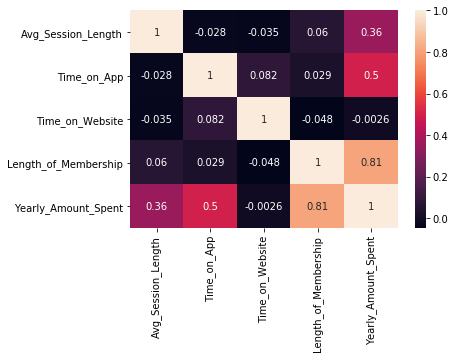

In [12]:
sns.heatmap(df.corr(),annot=True)

__Colunsion:__ 
    1. Lenght of Membership highly correleated with Yearly amount spent.
    2. Time on App more high [+ve] correlated with Yearly amount spent if we compare with Time on website.

__Compare the Time on Website and Yearly Amount Spent columns.  Is there a correlation?__

pearsonr= -0.0026 means there is no coreraltion between "Time on Website" and "Yearly Amount Spent".  

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


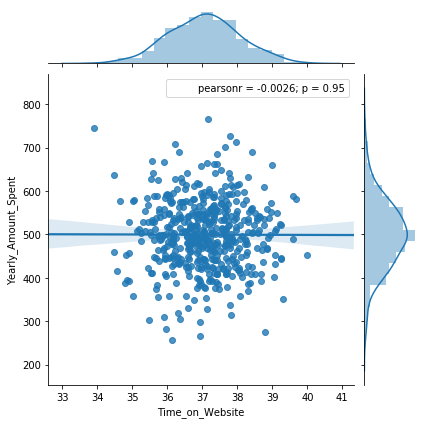

In [19]:
sns.jointplot('Time_on_Website','Yearly_Amount_Spent',data=df,kind='reg')

__Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1stOne?__

pearson = 0.5 means moderate correlation between "Time on App" and "Yearly Amount Spent". This correlation stongaer than 1stone.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


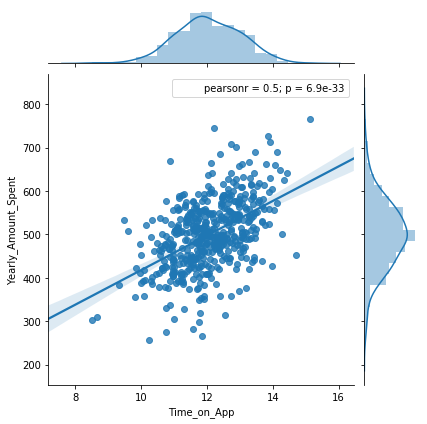

In [18]:
sns.jointplot('Time_on_App','Yearly_Amount_Spent',data=df,kind='reg')

__Explore types of relationships across the entire data set using pairplot . Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?__

Base on the below plot "Lenght of Membership" most correleated with "Yearly amount spent".

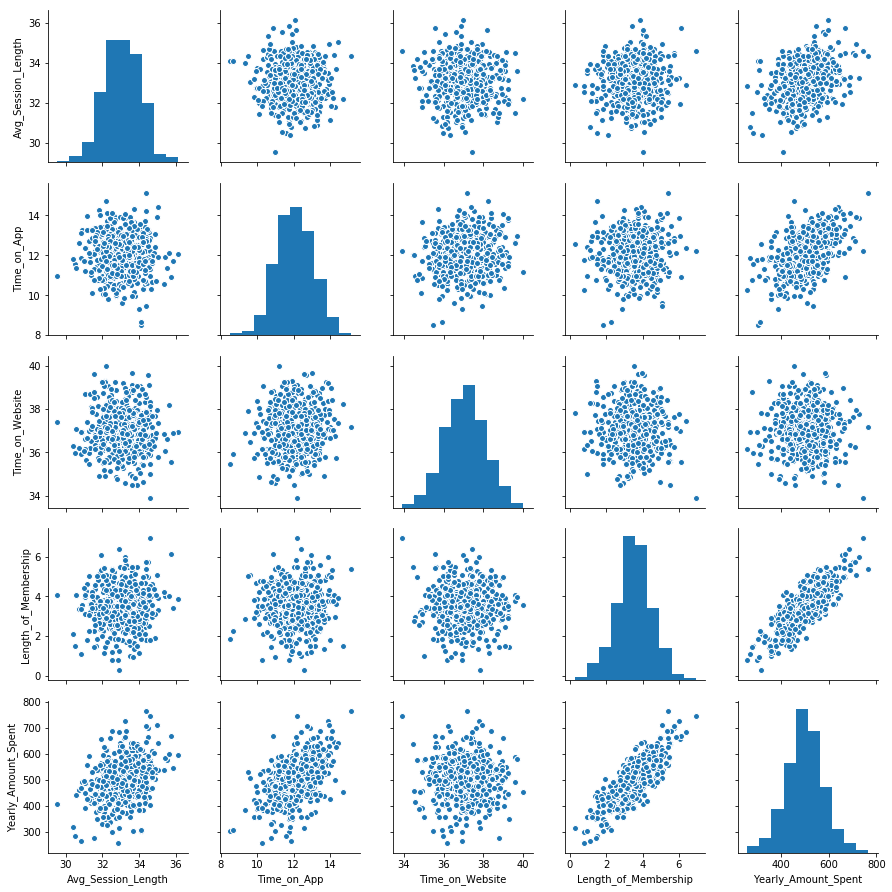

In [15]:
sns.pairplot(df)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


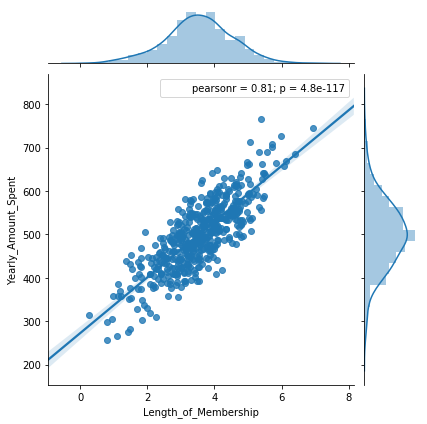

In [17]:
sns.jointplot('Length_of_Membership','Yearly_Amount_Spent',data=df,kind='reg')

__Based on above chart the correleation between "Length of Membership" and "Yearly Amount Spent" if 0.81 which is high. So we are creating ML model between this two field to predict yearly amount.__

### Prerequisite check before creating Model ###

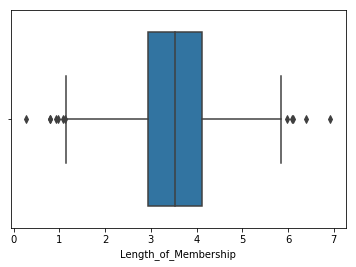

In [25]:
sns.boxplot('Length_of_Membership',data=df)

__From the above diagram some of the value show as outlier for "Length of Membership" might be require standard scaler.__ 

__Create dependent and independent test and training dataset__

In [118]:
x = df.drop(['Yearly_Amount_Spent','Time_on_Website'],axis=1) # Independent/Predictor 
y = df.Yearly_Amount_Spent # Dependent/terget 
# xs = StandardScaler().fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=85)


__Create Machine Learning Model __

In [119]:
ln = LinearRegression()

In [120]:
ln.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
ln.score(x_train,y_train)

0.9861137618532531

In [122]:
ln.score(x_test,y_test)

0.9784910571077085

In [123]:
y_predict = ln.predict(x_test)

__Check Actual and Predict Data__

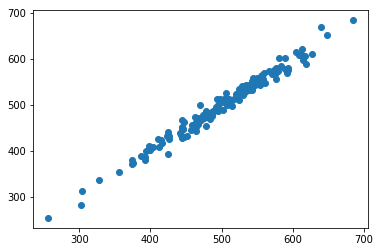

In [124]:
plt.scatter(y_test,y_predict)

In [125]:
x_test.iloc[2]

Avg_Session_Length      34.102279
Time_on_App              8.508152
Length_of_Membership     1.838211
Name: 309, dtype: float64

In [126]:
x_test.iloc[2].values @ ln.coef_ + ln.intercept_

283.33704585987334

__Top Factor to determine Yearly Amount Spent__

In [127]:
slopes =  pd.DataFrame({'Feature':x.columns, 'Coef':ln.coef_, 'Abs_coef': np.abs(ln.coef_)})
slopes.sort_values(by = 'Abs_coef', ascending = False).head()

,Feature,Coef,Abs_coef
2,Length_of_Membership,61.383738,61.383738
1,Time_on_App,39.213287,39.213287
0,Avg_Session_Length,26.074342,26.074342


__Checked mean squared error__

In [128]:
mean_squared_error(y_test,y_predict)

112.0327364823318